## Data Profilling Config

To create a configuration file for execution the data engineering steps - eventually leading to **DAG Graph** kind of execution.

Advantages

* readablity
* DAG - Quick execution
    * Ignore unncessary ones
* quick development

Str-Column:

* length
* total length with out spaces
* no.of words

Str-Column:

* differences btw lengths
* no.of common words
    
Approximate string matching




pip install fuzzywuzzy

* levistein deistance
* qratio
* wratio
* token set ratio
* 
   
## THRESHOLDS - HOLDS 

* set up a boolean function that it won't works.
* if it break executing anywhere - what values should I keep?

https://github.com/abhishekkrthakur/is_that_a_duplicate_quora_question/blob/master/feature_engineering.py

https://www.slideshare.net/abhishekkrthakur/is-that-a-duplicate-quora-question

http://c3js.org/examples.html

https://github.com/d3/d3

https://github.com/densitydesign/raw

https://gitlab.pramati.com/sampath.maddula/big-data-studio/boards

In [1]:
import pandas as pd

In [3]:
!head /Users/sampathm/Downloads/train.csv

head: cannot open '/Users/sampathm/Downloads/train.csv' for reading: No such file or directory


In [3]:
df = pd.read_csv('/Users/sampathm/Downloads/train.csv')

In [4]:
df.shape

(404290, 6)

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
data = df.head(500)

In [8]:

import pandas as pd
import numpy as np
# import gensim
from fuzzywuzzy import fuzz
from nltk.corpus import stopwords
from tqdm import tqdm
from scipy.stats import skew, kurtosis
from scipy.spatial.distance import cosine, cityblock, jaccard, canberra, euclidean, minkowski, braycurtis
from nltk import word_tokenize
stop_words = stopwords.words('english')

/Users/sampathm/miniconda3/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [10]:
data = df.head(500)

data = data.drop(['id', 'qid1', 'qid2'], axis=1)

from fuzzywuzzy import fuzz

data['len_q1'] = data.question1.apply(lambda x: len(str(x)))
data['len_q2'] = data.question2.apply(lambda x: len(str(x)))
data['diff_len'] = data.len_q1 - data.len_q2


data['len_char_q1'] = data.question1.apply(lambda x: len(''.join(set(str(x).replace(' ', '')))))
data['len_char_q2'] = data.question2.apply(lambda x: len(''.join(set(str(x).replace(' ', '')))))
data['len_word_q1'] = data.question1.apply(lambda x: len(str(x).split()))
data['len_word_q2'] = data.question2.apply(lambda x: len(str(x).split()))
data['common_words'] = data.apply(lambda x: len(set(str(x['question1']).lower().split()).intersection(set(str(x['question2']).lower().split()))), axis=1)

data['fuzz_qratio'] = data.apply(lambda x: fuzz.QRatio(str(x['question1']), str(x['question2'])), axis=1)
data['fuzz_WRatio'] = data.apply(lambda x: fuzz.WRatio(str(x['question1']), str(x['question2'])), axis=1)
data['fuzz_partial_ratio'] = data.apply(lambda x: fuzz.partial_ratio(str(x['question1']), str(x['question2'])), axis=1)

data['fuzz_partial_token_set_ratio'] = data.apply(lambda x: fuzz.partial_token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)
data['fuzz_partial_token_sort_ratio'] = data.apply(lambda x: fuzz.partial_token_sort_ratio(str(x['question1']), str(x['question2'])), axis=1)
data['fuzz_token_set_ratio'] = data.apply(lambda x: fuzz.token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)
data['fuzz_token_sort_ratio'] = data.apply(lambda x: fuzz.token_sort_ratio(str(x['question1']), str(x['question2'])), axis=1)


In [11]:
data.head(2)

,question1,question2,is_duplicate,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,9,20,20,14,12,10,93,95,98,100,88,100,93
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,-37,21,29,8,13,4,66,86,73,100,73,86,63


In [12]:
new_df = df.head(5)

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
id              5 non-null int64
qid1            5 non-null int64
qid2            5 non-null int64
question1       5 non-null object
question2       5 non-null object
is_duplicate    5 non-null int64
dtypes: int64(4), object(2)
memory usage: 320.0+ bytes


In [14]:
data_description = {
    'question1' : 'str',
    'question2' : 'str',
}

data_engineering_config = {
    'id' : 'drop',
    'qid1' : 'drop',
    'qid2' : 'drop',
    'col1' : 'question1',
    'col2' : 'question2',
    'col3' : [
                ('col1'), # list of required params
                (lambda x: str(x).upper()), # transformation function
             ]
}



In [15]:
new_df = df.head(5)


new_df = new_df.drop(['id', 'qid1', 'qid2'], axis=1)

print(new_df.columns)

# user - drop function iteself -- it is smooth

'''
data['len_q1'] = data.question1.apply(lambda x: len(str(x)))
data['len_q2'] = data.question2.apply(lambda x: len(str(x)))
data['diff_len'] = data.len_q1 - data.len_q2


data['len_char_q1'] = data.question1.apply(lambda x: len(''.join(set(str(x).replace(' ', '')))))
data['len_char_q2'] = data.question2.apply(lambda x: len(''.join(set(str(x).replace(' ', '')))))
data['len_word_q1'] = data.question1.apply(lambda x: len(str(x).split()))
data['len_word_q2'] = data.question2.apply(lambda x: len(str(x).split()))
data['common_words'] = data.apply(
     lambda x: len(set(str(x['question1']).lower().split()).intersection(set(str(x['question2']).lower().split()))), axis=1)


data['fuzz_qratio'] = data.apply(lambda x: fuzz.QRatio(str(x['question1']), str(x['question2'])), axis=1)
data['fuzz_WRatio'] = data.apply(lambda x: fuzz.WRatio(str(x['question1']), str(x['question2'])), axis=1)
data['fuzz_partial_ratio'] = data.apply(lambda x: fuzz.partial_ratio(str(x['question1']), str(x['question2'])), axis=1)


data['fuzz_partial_token_set_ratio'] = data.apply(lambda x: fuzz.partial_token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)
data['fuzz_partial_token_sort_ratio'] = data.apply(lambda x: fuzz.partial_token_sort_ratio(str(x['question1']), str(x['question2'])), axis=1)
data['fuzz_token_set_ratio'] = data.apply(lambda x: fuzz.token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)
data['fuzz_token_sort_ratio'] = data.apply(lambda x: fuzz.token_sort_ratio(str(x['question1']), str(x['question2'])), axis=1)

'''

# Apply 1 new column 1 old columns
data_engineering_config = [
    ('len_q1', 'question1', lambda x: len(str(x))),
    ('len_q2', 'question2', lambda x: len(str(x))),
    ('diff_len', ['len_q1', 'len_q2'], lambda x: x.len_q1 - x.len_q2),
    
    ('len_char_q1', 'question1', lambda x: len(''.join(set(str(x).replace(' ', ''))))),
    ('len_char_q2', 'question2', lambda x: len(''.join(set(str(x).replace(' ', ''))))),
    ('len_word_q1', 'question1', lambda x: len(str(x).split())),
    ('len_word_q2', 'question2', lambda x: len(str(x).split())),
    ('common_words',
     ['question1', 'question2'],
     lambda x: len(set(str(x['question1']).lower().split()).intersection(set(str(x['question2']).lower().split())))
    ),
    
    ('fuzz_qratio', ['question1', 'question2'], lambda x: fuzz.QRatio(str(x['question1']), str(x['question2']))),
    ('fuzz_WRatio', ['question1', 'question2'], lambda x: fuzz.WRatio(str(x['question1']), str(x['question2']))),
    ('fuzz_partial_ratio', ['question1', 'question2'], lambda x: fuzz.partial_ratio(str(x['question1']), str(x['question2']))),
    
    ('fuzz_partial_token_set_ratio', ['question1', 'question2'],
         lambda x: fuzz.partial_token_set_ratio(str(x['question1']), str(x['question2']))),
    ('fuzz_partial_token_sort_ratio', ['question1', 'question2'],
         lambda x: fuzz.partial_token_sort_ratio(str(x['question1']), str(x['question2']))),
    ('fuzz_token_set_ratio', ['question1', 'question2'],
         lambda x: fuzz.token_set_ratio(str(x['question1']), str(x['question2']))),
    ('fuzz_token_sort_ratio', ['question1', 'question2'],
         lambda x: fuzz.token_sort_ratio(str(x['question1']), str(x['question2']))),

]


for new_column, required_col, function in data_engineering_config:
    if type(required_col) == str:
        # ONLY ONE COLUMN
        new_df[new_column] = new_df[required_col].apply(function)
    if type(required_col) == list:
        # Multi-column - axis=1
        new_df[new_column] = new_df[required_col].apply(function, axis=1)
        
new_df.head().T

Index(['question1', 'question2', 'is_duplicate'], dtype='object')


,0,1,2,3,4
question1,What is the step by step guide to invest in sh...,What is the story of Kohinoor (Koh-i-Noor) Dia...,How can I increase the speed of my internet co...,Why am I mentally very lonely? How can I solve...,"Which one dissolve in water quikly sugar, salt..."
question2,What is the step by step guide to invest in sh...,What would happen if the Indian government sto...,How can Internet speed be increased by hacking...,Find the remainder when [math]23^{24}[/math] i...,Which fish would survive in salt water?
is_duplicate,0,0,0,0,0
len_q1,66,51,73,50,76
len_q2,57,88,59,65,39
diff_len,9,-37,14,-15,37
len_char_q1,20,21,25,19,25
len_char_q2,20,29,24,26,18
len_word_q1,14,8,14,11,13
len_word_q2,12,13,10,9,7


## visualize

In [16]:
from pprint import pprint
from logger import logger

import networkx as nx
import matplotlib.pyplot as plt

In [17]:
nx.draw

<function networkx.drawing.nx_pylab.draw>

In [111]:
tree_data = [('new-df', ['question1', 'question2', 'is_duplicate'])] + [(b, a) for a, b, c in data_engineering_config]

logger.info(['Parent Node', 'Child Node'])
logger.info(tree_data)

graph_edges = list()

def one_to_one(parent, child):
    graph_edges.append((parent, child))

def one_to_many(parent, alist):
    for each in alist:
        graph_edges.append((parent, each))

def many_to_one(alist, child):
    for each in alist:
        graph_edges.append((each, child))

def many_to_many(alist1, alist2):
    for each1 in alist1:
        for each2 in alist2:
            graph_edges.append((each1, each2))
            
            
def plot_graph(graph_edges):
    # plot a graphs based on the edges provided
    g = nx.MultiGraph()
    for a, b in graph_edges:
        g.add_edge(a, b, width=8,alpha=0.5,edge_color='b')

    g.nodes['new-df']['node_color']='b'
    # nx.draw(g, with_labels=True, node_size=2500, edge_cmap=plt.cm.Reds, alpha=0.8)
    nx.draw(g, with_labels=True)
    plt.draw()
    plt.show()
    
for root, dependencies in tree_data:
    fns_mapping = {
        (str, str): one_to_one,
        (str, list): one_to_many,
        (list, str): many_to_one,
        (list, list): many_to_many,
    }
#     logger.debug('===' * 15)
    fns_mapping[(root.__class__, dependencies.__class__)](root, dependencies)
#     logger.debug(graph_edges)

INFO: ['Parent Node', 'Child Node']
INFO: [('new-df', ['question1', 'question2', 'is_duplicate']), ('question1', 'len_q1'), ('question2', 'len_q2'), (['len_q1', 'len_q2'], 'diff_len'), ('question1', 'len_char_q1'), ('question2', 'len_char_q2'), ('question1', 'len_word_q1'), ('question2', 'len_word_q2'), (['question1', 'question2'], 'common_words'), (['question1', 'question2'], 'fuzz_qratio'), (['question1', 'question2'], 'fuzz_WRatio'), (['question1', 'question2'], 'fuzz_partial_ratio')]


DEBUG: ('new-df', 'question1')
DEBUG: ('new-df', 'question2')
DEBUG: ('new-df', 'is_duplicate')
DEBUG: ('question1', 'len_q1')
DEBUG: ('question2', 'len_q2')
DEBUG: ('len_q1', 'diff_len')
DEBUG: ('len_q2', 'diff_len')
DEBUG: ('question1', 'len_char_q1')
DEBUG: ('question2', 'len_char_q2')
DEBUG: ('question1', 'len_word_q1')
DEBUG: ('question2', 'len_word_q2')
DEBUG: ('question1', 'common_words')
DEBUG: ('question2', 'common_words')
DEBUG: ('question1', 'fuzz_qratio')
DEBUG: ('question2', 'fuzz_qratio')
DEBUG: ('question1', 'fuzz_WRatio')
DEBUG: ('question2', 'fuzz_WRatio')
DEBUG: ('question1', 'fuzz_partial_ratio')
DEBUG: ('question2', 'fuzz_partial_ratio')
saved file to /tmp/unix.gv.png


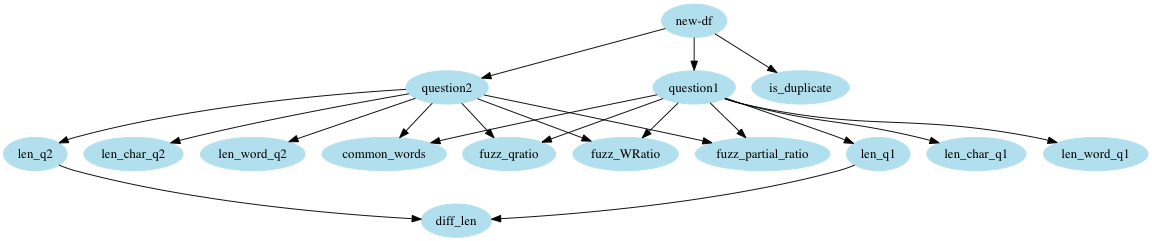

In [112]:
# unix.py - http://www.graphviz.org/content/unix

from graphviz import Digraph
from IPython.display import Image



def plot_nodes_data(graph_edges):
    u = Digraph('unix', filename='/tmp/unix.gv', format='png')
    u.attr(size='9,18')
    u.node_attr.update(color='lightblue2', style='filled')

    for a, b in graph_edges:
        logger.debug((a,b))
        u.edge(a, b)
#     u.view()
    u.save()
    print('saved file to', u.filename + '.' + u.format)
    return u.filename + '.' + u.format

Image(plot_nodes_data(graph_edges))